In [12]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
from collections import deque


#### **Question 1. Strongly Connected Components**

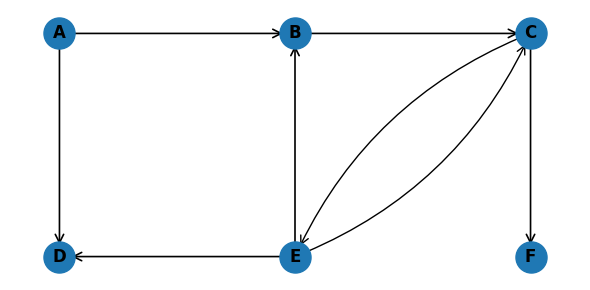

In [13]:
# Create directed graph
G = nx.DiGraph()

# Add nodes
G.add_nodes_from(list("ABCDEF"))

# Add edges (from the picture)
edges = [
    ("A", "B"),
    ("A", "D"),
    ("E", "D"),
    ("E", "B"),
    ("B", "C"),
    ("C", "F"),
    ("E", "C"),
    ("C", "E"),   # opposite direction, so C <-> E
]
G.add_edges_from(edges)

# Fix positions to match the picture (top row A-B-C, bottom row D-E-F)
pos = {
    "A": (0, 1),
    "B": (1, 1),
    "C": (2, 1),
    "D": (0, 0),
    "E": (1, 0),
    "F": (2, 0),
}

plt.figure(figsize=(6, 3))

# Draw nodes and labels
nx.draw_networkx_nodes(G, pos, node_size=500)
nx.draw_networkx_labels(G, pos, font_size=12, font_weight="bold")

# Straight edges (all except the two between C and E)
straight_edges = [
    ("A", "B"),
    ("A", "D"),
    ("E", "D"),
    ("E", "B"),
    ("B", "C"),
    ("C", "F"),
]
nx.draw_networkx_edges(
    G,
    pos,
    edgelist=straight_edges,
    arrowstyle="->",
    arrowsize=15,
    width=1.2,
)

# Curved edges between C and E to show both directions
curved_edges = [("E", "C"), ("C", "E")]
nx.draw_networkx_edges(
    G,
    pos,
    edgelist=curved_edges,
    arrowstyle="->",
    arrowsize=15,
    connectionstyle="arc3,rad=0.2",
)

plt.axis("off")
plt.tight_layout()
plt.show()


**Strongly Connected Components (SCCs)** are a fundamental concept in graph theory and algorithms. In a directed graph, a Strongly Connected Component is a subset of vertices where every vertex in the subset is reachable from every other vertex in the same subset by traversing the directed edges.

In [14]:
#Find SCCs
sccs = list(nx.strongly_connected_components(G))
sccs_sorted = sorted(sccs, key=lambda x: min(x))

print("Strongly Connected Components (SCCs):")
for scc, comp in enumerate(sccs_sorted):
    print(f"SCC {scc + 1}: {comp}")

Strongly Connected Components (SCCs):
SCC 1: {'A'}
SCC 2: {'E', 'C', 'B'}
SCC 3: {'D'}
SCC 4: {'F'}


#### **Formal Definitions in the Context of SCCs**

When we decompose a directed graph into strongly connected components (SCCs) and build the condensation graph (a DAG where each node represents an SCC):

- **Source Component:** An SCC with no incoming edges from any other SCC in the condensation graph. → It’s the starting point for reachability.

- **Sink Component:** An SCC with no outgoing edges to any other SCC in the condensation graph. → It’s the endpoint for reachability.

In [15]:
Components = nx.condensation(G) #each node in this graph represents a strongly connected component in the original graph
mapping = Components.graph["mapping"] #dictionary mapping each node in the original graph to its corresponding component in the condensation graph
inverted_map = {}
for v, comp in mapping.items():
    inverted_map.setdefault(comp, []).append(v)

print("\nCondensation Graph Components:")
for comp, vertices in inverted_map.items():
    print(f"Component {comp}: {vertices}")


#determine which are sink components, 
print("\nSink SCCs:")
for comp in Components:
    if Components.out_degree(comp) == 0:
        print(f"Component {comp}: {inverted_map[comp]}")

#which are source components, and 
print("\nSource SCCs:")
for comp in Components:
    if Components.in_degree(comp) == 0:
        print(f"Component {comp}: {inverted_map[comp]}")

# which are belong to neither category
print("\nNeither Source nor Sink SCCs:")
for comp in Components:
    if Components.in_degree(comp) > 0 and Components.out_degree(comp) > 0:
        print(f"Component {comp}: {inverted_map[comp]}")



Condensation Graph Components:
Component 0: ['F']
Component 1: ['D']
Component 2: ['E', 'C', 'B']
Component 3: ['A']

Sink SCCs:
Component 0: ['F']
Component 1: ['D']

Source SCCs:
Component 3: ['A']

Neither Source nor Sink SCCs:
Component 2: ['E', 'C', 'B']


In [16]:
#(Optional) Add F->A and recompute SCCs to verify

G.add_edges_from([("F", "A")])  # Adding an edge from F to A to create a cycle
sccs_after = list(nx.strongly_connected_components(G))
print("\nSCCs after adding edge F -> A:")
for scc, comp in enumerate(sorted(sccs_after, key=lambda x: min(x))):
    print(f"SCC {scc + 1}: {comp}")  


SCCs after adding edge F -> A:
SCC 1: {'F', 'C', 'E', 'B', 'A'}
SCC 2: {'D'}


#### **Question 2. Find connected components (CC) by remove the direction and edges *[(E, C),(C, E),(B, C)]* in graph G.**

In [19]:
# Find connected components (CC)
G = nx.Graph()  # Undirected graph for connected components

edges_remove = [("E", "C"), ("B", "C")]
final_edges = [edge for edge in edges if edge not in edges_remove]

G.add_edges_from(final_edges)
print(f"Finall edge: {final_edges}")

components = list(nx.connected_components(G))
print("\nConnected Components (CCs):")
for i, cmp in enumerate(components):
    print(f"CC {i + 1}: {cmp}")


print("\nNumber of connected components:", nx.number_connected_components(G))

Finall edge: [('A', 'B'), ('A', 'D'), ('E', 'D'), ('E', 'B'), ('C', 'F'), ('C', 'E')]

Connected Components (CCs):
CC 1: {'F', 'C', 'D', 'E', 'B', 'A'}

Number of connected components: 1


In [21]:
# DFS traversal from node 'A'
def dfs_traversal(graph, start_node):
    visited = set()
    traversal_order = []

    def dfs(node):
        visited.add(node)
        traversal_order.append(node)
        for neighbor in graph.neighbors(node):
            if neighbor not in visited:
                dfs(neighbor)

    dfs(start_node)
    return traversal_order

dfs_order = dfs_traversal(G, 'A')
print("\nDFS Traversal starting from node 'A':", dfs_order)


DFS Traversal starting from node 'A': ['A', 'B', 'E', 'D', 'C', 'F']


In [23]:
# dfs (build in function)
start_node = 'A'
dfs_order = dfs_traversal(G, start_node)
print(f"\nDFS Traversal starting from node '{start_node}':", dfs_order)


DFS Traversal starting from node 'A': ['A', 'B', 'E', 'D', 'C', 'F']


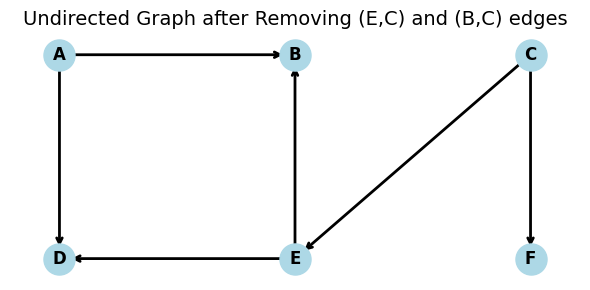

In [44]:
# Visualization
plt.figure(figsize=(6, 3))
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')
nx.draw_networkx_edges(G, pos, arrows=True, arrowstyle="->", width=2, edgelist=final_edges, edge_color='black')
plt.title("Undirected Graph after Removing (E,C) and (B,C) edges", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()
